# DS3000 Credit Card Fraud Detection

# Task 2 — Dataset Exploration & Preprocessing

This notebook:
- Describes the credit card fraud dataset (size, PCA components, class imbalance).  
- Implements the preprocessing pipeline (stratified 80/10/10 split, Min–Max scaling on Amount, SMOTE).  
- Shows class distribution before and after SMOTE.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from preprocess import load_and_preprocess_data



## 1. Load raw dataset


In [ ]:
# Load just the raw dataframe for description
df_raw = pd.read_csv("creditcard_2023.csv")

print("Dataset shape:", df_raw.shape)
print("\nFirst few rows:")
print(df_raw.head())

Dataset shape: (568630, 31)

First few rows:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   


In [39]:
print("Column names:\n", df_raw.columns.tolist(), "\n")

print("Basic info:")
df_raw.info()

print("\nSummary statistics (first few columns):")
df_raw.describe().iloc[:, :5]


Column names:
 ['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'] 

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 

,id,V1,V2,V3,V4
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00


Class counts (raw data):
Class
0    284315
1    284315
Name: count, dtype: int64


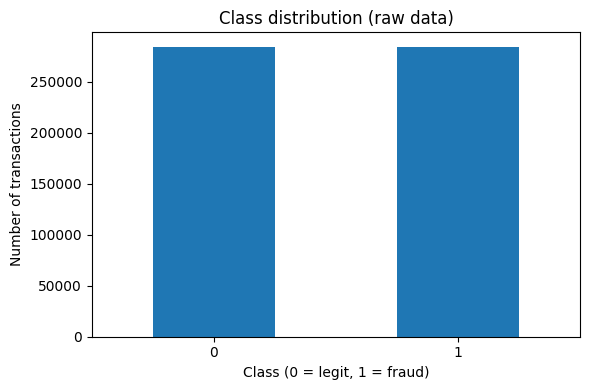


Minority / majority ratio: 1.000000


In [40]:
label_col = "Class"  # adjust here if your label name ever changes

class_counts = df_raw[label_col].value_counts().sort_index()
print("Class counts (raw data):")
print(class_counts)

plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar")
plt.title("Class distribution (raw data)")
plt.xlabel(f"{label_col} (0 = legit, 1 = fraud)")
plt.ylabel("Number of transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

minority_ratio = class_counts.min() / class_counts.max()
print(f"\nMinority / majority ratio: {minority_ratio:.6f}")


In [41]:
data = load_and_preprocess_data("creditcard_2023.csv")

X_train = data["X_train"]
X_val   = data["X_val"]
X_test  = data["X_test"]
y_train = data["y_train"]
y_val   = data["y_val"]
y_test  = data["y_test"]

X_train_sm = data["X_train_sm"]   # after SMOTE
y_train_sm = data["y_train_sm"]

print("Train shape (before SMOTE):", X_train.shape)
print("Train labels (before SMOTE):", y_train.value_counts().to_dict())
print("\nTrain shape (after SMOTE):", X_train_sm.shape)
print("Train labels (after SMOTE):", Counter(y_train_sm))
print("\nVal shape:", X_val.shape, " Labels:", y_val.value_counts().to_dict())
print("Test shape:", X_test.shape, " Labels:", y_test.value_counts().to_dict())


KeyError: 'X_train_sm'

## 2. Dataset summary

**Rows:** (will be filled from code output)  
- **Columns:**  
  - `Time` (if present) – time elapsed between this transaction and the first transaction in the dataset.  
  - `V1`–`V28` – anonymized **PCA components** of the original features.  
  - `Amount` – transaction amount.  
  - `Class` – target label (0 = legitimate, 1 = fraud).  

### Class distribution (raw data)

Class counts (raw data):
Class
0    284315
1    284315
Name: count, dtype: int64


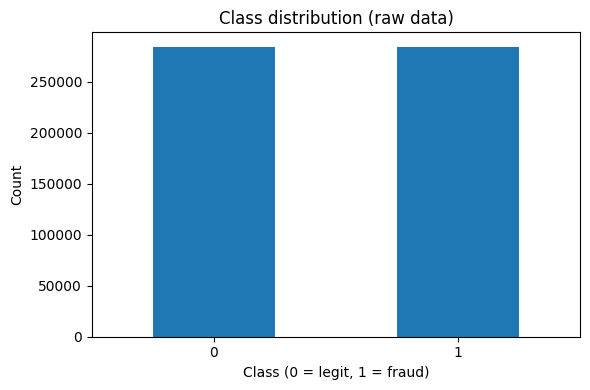

In [31]:
label_col = "Class"  # update if different in your file

class_counts = df_raw[label_col].value_counts().sort_index()
print("Class counts (raw data):")
print(class_counts)

plt.figure(figsize=(6, 4))
class_counts.plot(kind="bar")
plt.title("Class distribution (raw data)")
plt.xlabel(f"{label_col} (0 = legit, 1 = fraud)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [32]:
data = load_and_preprocess_data("creditcard_2023.csv")

X_train = data["X_train"]
X_val   = data["X_val"]
X_test  = data["X_test"]
y_train = data["y_train"]
y_val   = data["y_val"]
y_test  = data["y_test"]

X_train_sm = data["X_train_sm"]
y_train_sm = data["y_train_sm"]

print("Train shape (before SMOTE):", X_train.shape, "Labels:", y_train.value_counts().to_dict())
print("Train shape (after SMOTE): ", X_train_sm.shape, "Labels:", Counter(y_train_sm))
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)


KeyError: 'X_train_sm'